# Scott Miller CLUSTERING
So I have to do clustering for my group project. 
As defined in Page 294 of O'Reilly Practical Statistics for data scientists, clustering is a technique to divide data into different groups, where the records in each group are similar to one another. The goal of clustering is to indentify significant and meaningful groups of data. It says that Kmeans was the first clustering method and is still widely used today so lets start with that.

#### Importing libraries

In [110]:
import pandas as pd
import requests
from pandas import DataFrame, Series
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns 


### Importing dataset

In [2]:
cars = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
cars_df = pd.DataFrame(cars)

In [31]:
cars_df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
cluster_labels     int32
dtype: object

In [5]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
cars_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
cars_df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
len(cars_df)

4340

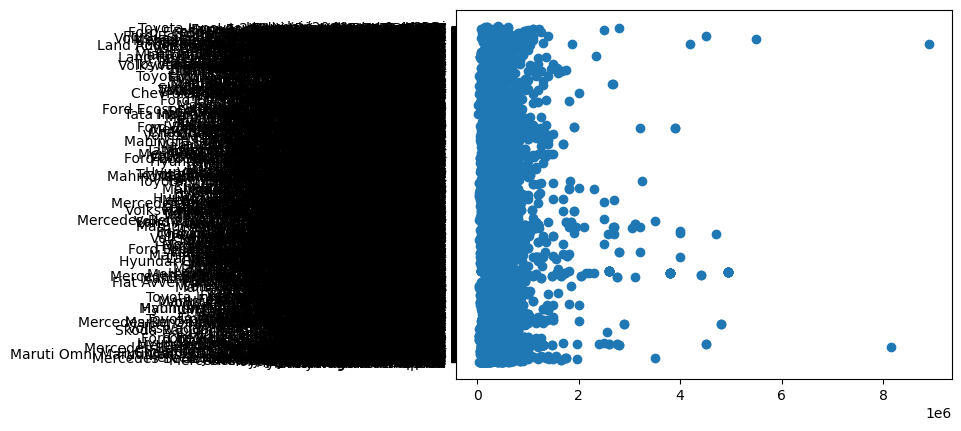

<Figure size 1000x2000 with 0 Axes>

In [105]:
name_var = cars_df['name']
price_var = cars_df['selling_price']
year_var = cars_df['year']
transmission_var = cars_df['transmission']
seller_type_var = cars_df['seller_type']
fuel_var = cars_df['fuel']
km_driven_var = cars_df['km_driven']
owner_var = cars_df['owner']


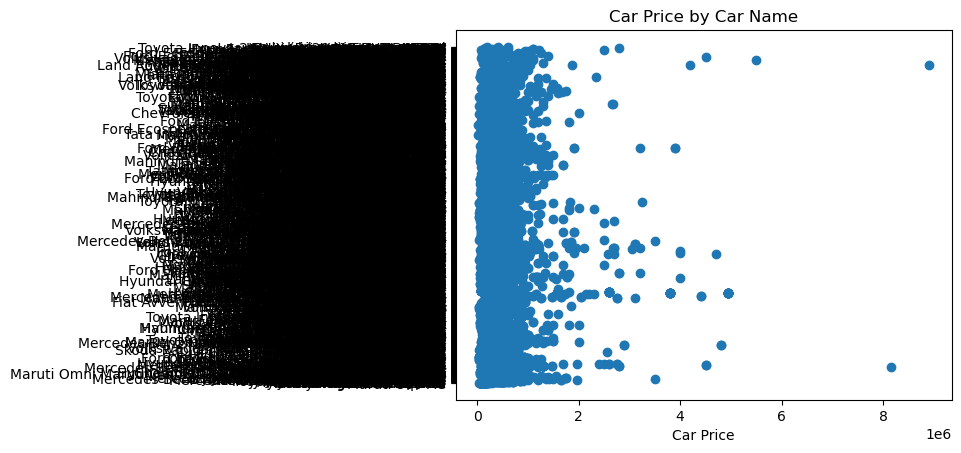

In [109]:
plt.scatter(price_var, name_var)
plt.title("Car Price by Car Name")
plt.xlabel("Car Price")
plt.show()

One of the variables is name is categorical so KMeans is not a great option, even if I could convert the categorical column into some numeric there are too many names, it is far too cluttered of a data set right now to get any visual insights from. I could run it on a sample and try and scale it up to get some insights but I would need some more insights 

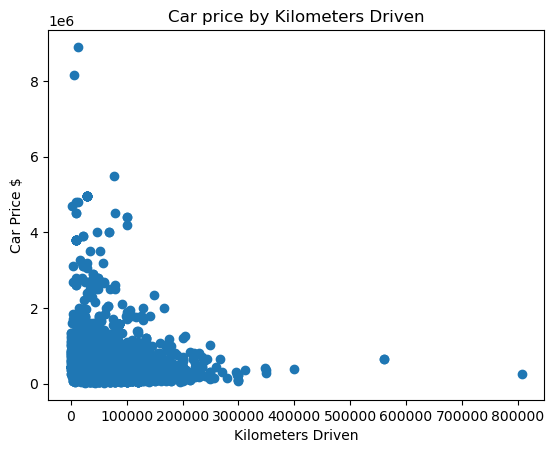

In [102]:

plt.scatter(km_driven_var, price_var)
plt.title("Car price by Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Car Price $")
plt.show()

Both variables are numerical data types and they 

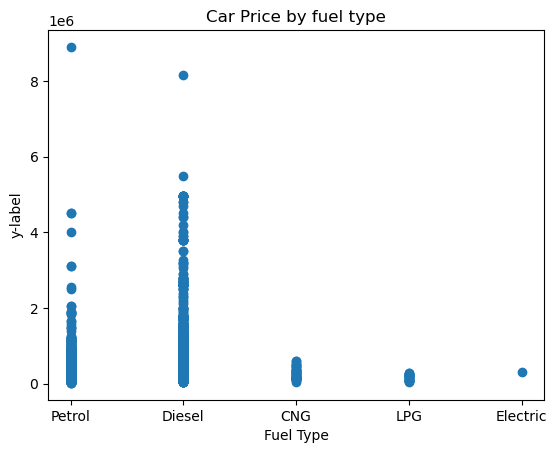

In [99]:

plt.scatter(fuel_var, price_var)
plt.title("Car Price by fuel type")
plt.xlabel("Fuel Type")
plt.ylabel("y-label")
plt.show()

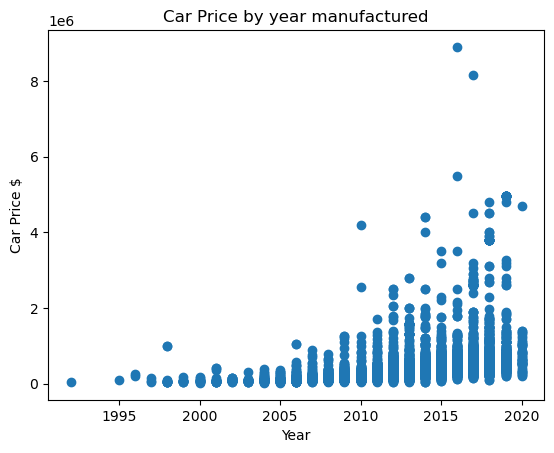

In [101]:

plt.scatter(year_var, price_var)
plt.title("Car Price by year manufactured")
plt.xlabel("Year")
plt.ylabel("Car Price $")
plt.show()

Two numerical values and a beautifully spread out scatter plot. An ideal candidate for KMeans cluster analysis. 

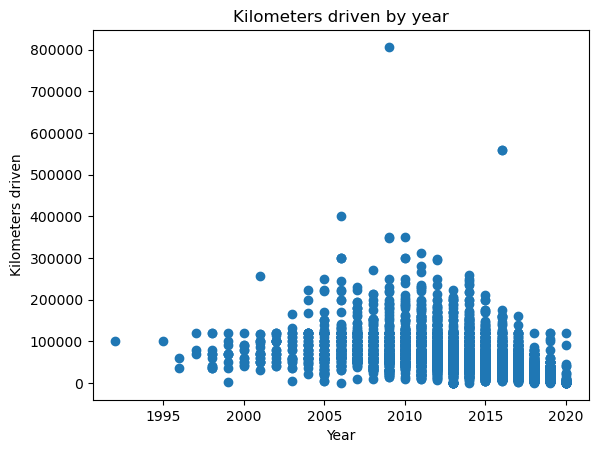

In [111]:
plt.scatter(year_var, km_driven_var)
plt.title("Kilometers driven by year")
plt.xlabel("Year")
plt.ylabel("Kilometers driven")
plt.show()

Two numerical values and a beautifully spread out scatter plot. An ideal candidate for KMeans cluster analysis. 

In [39]:
#Divide the year selling price grouping into clusters, 
year_price_df = cars_df[['year', 'selling_price']]
display(year_price_df)
kmeans = KMeans(n_clusters = 3).fit(year_price_df)


,year,selling_price
0,2007,60000
1,2007,135000
2,2012,600000
3,2017,250000
4,2014,450000
...,...,...
4335,2014,409999
4336,2014,409999
4337,2009,110000
4338,2016,865000


c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [40]:
#Cluster labels find which cluster each of the year selling_price combinations fall under
year_price_df['cluster'] = kmeans.labels_
year_price_df

C:\Users\scott\AppData\Local\Temp\ipykernel_39060\3833061136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_price_df['cluster'] = kmeans.labels_


,year,selling_price,cluster
0,2007,60000,0
1,2007,135000,0
2,2012,600000,2
3,2017,250000,0
4,2014,450000,0
...,...,...,...
4335,2014,409999,0
4336,2014,409999,0
4337,2009,110000,0
4338,2016,865000,2


In [41]:
#learn the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['year', 'selling_price'])
centers

,year,selling_price
0,2011.961356,2.845000e+05
1,2017.032609,3.527859e+06
2,2016.026581,8.846773e+05


<Axes: xlabel='year', ylabel='selling_price'>

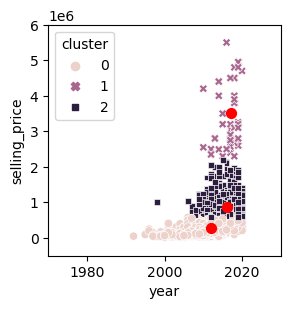

In [54]:
year_price_df
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.scatterplot(x='year', y='selling_price', hue='cluster', style='cluster', ax=ax, data=year_price_df)
ax.set_xlim(1970, 2030)
ax.set_ylim(-500000, 6000000)
centers.plot.scatter(x='year', y='selling_price', ax=ax, s=50, color='red')

c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scott\AppData\Local\Temp\ipykernel_39060\1932814651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_price_df['cluster'] = kmeans.labels_


,year,selling_price
0,2015.878311,7.321517e+05
1,2015.921429,2.069214e+06
2,2011.470673,2.494600e+05
3,2017.585366,4.546293e+06


<Axes: xlabel='year', ylabel='selling_price'>

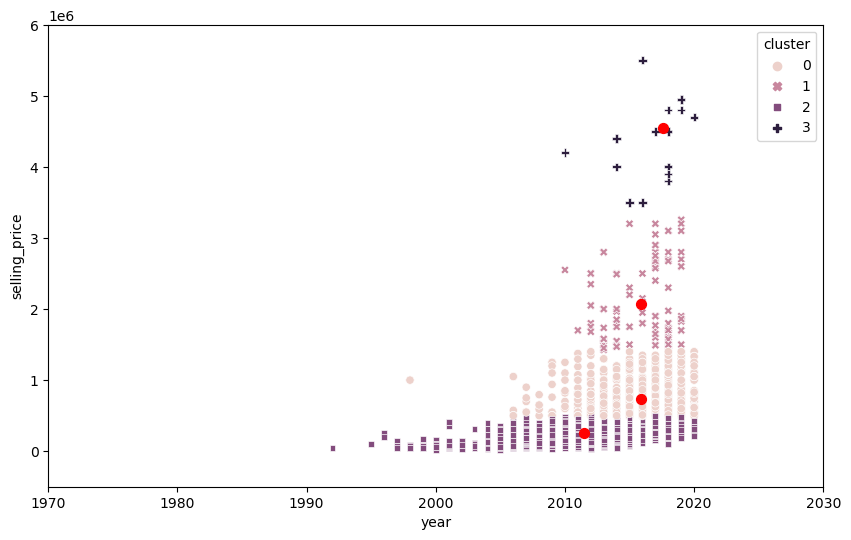

In [98]:
#Divide the year selling price grouping into clusters, 
year_price_df = cars_df[['year', 'selling_price']]
kmeans = KMeans(n_clusters = 4).fit(year_price_df)
#Cluster labels find which cluster each of the year selling_price combinations fall under
year_price_df['cluster'] = kmeans.labels_
year_price_df
#learn the cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['year', 'selling_price'])
display(centers)
year_price_df
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x='year', y='selling_price', hue='cluster', style='cluster', ax=ax, data=year_price_df)
ax.set_xlim(1970, 2030)
ax.set_ylim(-500000, 6000000)
centers.plot.scatter(x='year', y='selling_price', ax=ax, s=50, color='red')


You can see from the above visual and plot that most of the values

#### Lets do more KMeans analysis but with km_driven and price

c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scott\AppData\Local\Temp\ipykernel_39060\781271972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driven_price['cluster'] = kmeans.labels_


,selling_price,km_driven
0,7.223893e+05,53272.014235
1,2.011895e+06,49621.836601
2,2.476241e+05,74302.000000
3,4.546293e+06,31106.609756


<Axes: xlabel='km_driven', ylabel='selling_price'>

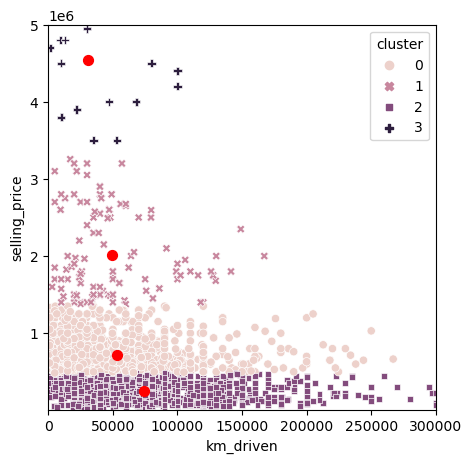

In [93]:
driven_price = cars_df[['selling_price', 'km_driven']]
#plt.scatter(driven_price['selling_price'], driven_price['km_driven'])
#based off the initial scatter plot I am seeing 3-5 clusters 
kmeans = KMeans(n_clusters = 4).fit(driven_price)
#Cluster labels find which cluster each of the km_driven selling_price combinations fall under
driven_price['cluster'] = kmeans.labels_
driven_price
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['selling_price', 'km_driven'])
display(centers)
fig, ax = plt.subplots(figsize =(5,5))
ax = sns.scatterplot(x='km_driven', y='selling_price', hue='cluster', style = 'cluster',ax = ax, data = driven_price)
ax.set_xlim(0, 300000)
ax.set_ylim(10000, 5000000)
centers.plot.scatter(x='km_driven', y = 'selling_price', ax = ax, s=50, color = 'red')

### Lets do KMeans with Year and km_driven

c:\Users\scott\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scott\AppData\Local\Temp\ipykernel_39060\1231229164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_km_driven['cluster'] = kmeans.labels_


,year,km_driven,cluster
0,2007,70000,0
1,2007,50000,0
2,2012,100000,3
3,2017,46000,0
4,2014,141000,3
...,...,...,...
4335,2014,80000,0
4336,2014,80000,0
4337,2009,83000,0
4338,2016,90000,3


,year,km_driven
0,2012.373231,63238.275943
1,2010.398438,223113.617188
2,2015.801642,24074.906293
3,2010.812144,110406.358634


<Axes: xlabel='year', ylabel='km_driven'>

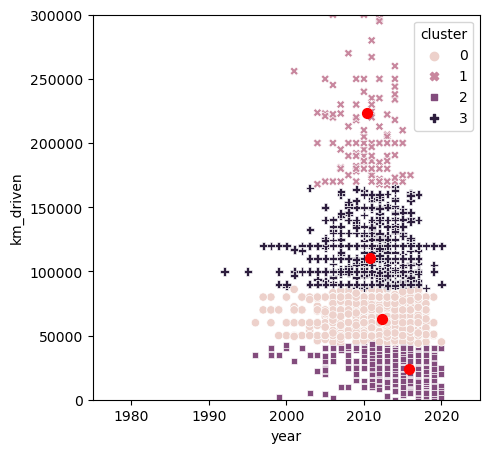

In [114]:
year_km_driven = cars_df[['year', 'km_driven']]
kmeans = KMeans(n_clusters= 4).fit(year_km_driven)
year_km_driven['cluster'] = kmeans.labels_
display(year_km_driven)
centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['year', 'km_driven'])
display(centers)
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.scatterplot(x='year', y = 'km_driven', hue = 'cluster', style='cluster',
                      ax = ax, data = year_km_driven)
ax.set_xlim(1975, 2025)
ax.set_ylim(0, 300000)
centers.plot.scatter(x='year', y='km_driven', ax = ax, s=50, color = 'red')